In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [5]:
import os
import pickle
from pathlib import Path
import pandas as pd

# Define paths
PPMI_CLINICAL_GEN_DATA_DIR_INSIDE = Path('D:/data/raw/ppmi/behavior')
dataset_name = '01_22_2024'
PPMI_CLINICAL_GEN_DATA_DIR_INSIDE = PPMI_CLINICAL_GEN_DATA_DIR_INSIDE / 'dadu_etal_generated_data/clinical/ppmi'

# Load preprocessed data
preprocessed_data = pd.read_pickle(os.path.join(PPMI_CLINICAL_GEN_DATA_DIR_INSIDE, 'preprocessed', f"{dataset_name}.pkl"))

# Load representation learning data
representation_learning_data = pd.read_pickle(os.path.join(PPMI_CLINICAL_GEN_DATA_DIR_INSIDE, 'representation_learning', f"{dataset_name}.pkl"))

# Load clustering data
clustering_data = pd.read_pickle(os.path.join(PPMI_CLINICAL_GEN_DATA_DIR_INSIDE, 'clustering', f"{dataset_name}.pkl"))
dset_name = 'paper_experiment_flip_outlier'

In [6]:
dataframe = pd.DataFrame(preprocessed_data['M_chosen'][dset_name])


In [16]:
dataframe = drop_updrs_2_3_4(dataframe)

C:\Users\User\AppData\Local\Temp\ipykernel_11088\1476762920.py:13: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(columns=updrs2_columns + updrs3_columns)


In [17]:
dataframe = add_updrs1_column(dataframe)

C:\Users\User\AppData\Local\Temp\ipykernel_11088\479052880.py:12: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(columns=updrs1_columns)


In [18]:
bl_columns = [col for col in dataframe.columns if 'BL' in col]
bl_v04_columns = [col for col in dataframe.columns if 'BL' in col or 'V04' in col]
bl_v04_v06_columns = [col for col in dataframe.columns if 'BL' in col or 'V04' in col or 'V06' in col]
bl_v04_v06_v08_columns = [col for col in dataframe.columns if 'BL' in col or 'V04' in col or 'V06' in col or 'V08' in col]
bl_v04_v06_v08_v10_columns = [col for col in dataframe.columns if 'BL' in col or 'V04' in col or 'V06' in col or 'V08' in col  or 'V10' in col]
bl_v04_v06_v08_v10_v12_columns = [col for col in dataframe.columns if 'BL' in col or 'V04' in col or 'V06' in col or 'V08' in col  or 'V10' in col or 'V12' in col]

bl_dataframe = dataframe[bl_columns]
bl_v04_dataframe = dataframe[bl_v04_columns]
bl_v04_v06_dataframe = dataframe[bl_v04_v06_columns]
bl_v04_v06_v08_dataframe = dataframe[bl_v04_v06_v08_columns]
bl_v04_v06_v08_v10_dataframe = dataframe[bl_v04_v06_v08_v10_columns]
bl_v04_v06_v08_v10_v12_dataframe = dataframe[bl_v04_v06_v08_v10_v12_columns]

In [19]:
bl_dataframe, bl_target_column = extract_and_drop_target(bl_dataframe, 'UPDRS1', 'BL')

bl_v04_dataframe, bl_v04_target_column = extract_and_drop_target(bl_v04_dataframe, 'UPDRS1', 'V04')

bl_v04_v06_dataframe, bl_v04_v06_target_column = extract_and_drop_target(bl_v04_v06_dataframe, 'UPDRS1', 'V06')

bl_v04_v06_v08_dataframe, bl_v04_v06_v08_target_column = extract_and_drop_target(bl_v04_v06_v08_dataframe, 'UPDRS1', 'V08')

bl_v04_v06_v08_v10_dataframe, bl_v04_v06_v08_v10_target_column = extract_and_drop_target(bl_v04_v06_v08_v10_dataframe, 'UPDRS1', 'V10')

bl_v04_v06_v08_v10_v12_dataframe, bl_v04__v06_v08_v10_v12_target_column = extract_and_drop_target(bl_v04_v06_v08_v10_v12_dataframe, 'UPDRS1', 'V12')

In [21]:
bl_v04_v06_v08_v10_dataframe

CN2RSP                     CN346RSP                      ...  \
EVENT_ID     BL  V04  V06  V08  V10       BL  V04  V06  V08  V10  ...   
PATNO                                                             ...   
3000        0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0  ...   
3001        0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0  ...   
3002        0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0  ...   
3003        0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0  ...   
3004        0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0  ...   
...         ...  ...  ...  ...  ...      ...  ...  ...  ...  ...  ...   
60059       0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0  ...   
60060       0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0  ...   
60063       0.0  0.0  0.0  0.0  0.0      1.0  0.0  0.0  0.0  0.0  ...   
65002       0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0  ...   
90456       0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0  ...   

           a_trait  SDMTOTAL                                          \
EVENT_ID       V10        BL       V04       V06       V08       V10   
PATNO                                                                  
3000      0.371429  0.294118  0.254902  0.333333  0.294118  0.333333   
3001      0.371429  0.509804  0.627451  0.509804  0.392157  0.392157   
3002      0.685714  0.529412  0.588235  0.745098  0.470588  0.490196   
3003      0.142857  0.607843  0.666667  0.568627  0.372549  0.509804   
3004      0.228571  0.411765  0.274510  0.352941  0.431373  0.294118   
...            ...       ...       ...       ...       ...       ...   
60059     0.028571  1.000000  1.000000  1.000000  1.000000  1.000000   
60060     0.542857  0.882353  0.745098  0.803922  0.705882  0.823529   
60063     0.457143  1.000000  1.000000  1.000000  1.000000  1.000000   
65002     0.866667  0.647059  0.549020  0.725490  0.607843  0.490196   
90456     0.114286  0.803922  0.921569  0.803922  0.901961  0.921569   

            UPDRS1                                
EVENT_ID        BL       V04       V06       V08  
PATNO                                             
3000      2.619565  2.036232  2.434783  3.452899  
3001      2.452899  4.536232  2.786232  4.036232  
3002      3.351449  3.702899  7.369565  4.952899  
3003      4.351449  3.351449  2.434783  5.101449  
3004      0.768116  0.768116  1.601449  1.518116  
...            ...       ...       ...       ...  
60059     0.500000  1.916667  0.500000  1.750000  
60060     3.202899  2.202899  2.768116  2.268116  
60063     1.000000  1.500000  1.000000  1.166667  
65002     4.351449  6.268116  4.869565  4.952899  
90456     3.536232  2.786232  4.036232  3.702899  

[476 rows x 314 columns]

In [121]:
dataframes = [
    ('BL', bl_dataframe, bl_target_column), 
    ('BL_V04', bl_v04_dataframe, bl_v04_target_column), 
    ('BL_V04_V06', bl_v04_v06_dataframe, bl_v04_v06_target_column), 
    ('BL_V04_V06_V08', bl_v04_v06_v08_dataframe, bl_v04_v06_v08_target_column), 
    ('BL_V04_V06_V08_V10', bl_v04_v06_v08_v10_dataframe, bl_v04_v06_v08_v10_target_column), 
    ('BL_V04_V06_V08_V10_V12', bl_v04_v06_v08_v10_v12_dataframe, bl_v04__v06_v08_v10_v12_target_column)
]

# Results storage
results = []

# Process each dataframe
for name, df, target_column in dataframes:
    # PCA
    best_model_pca, best_params_pca, best_score_pca, mse_pca, r2_pca = complete_workflow_pca(df, target_column)
    results.append({
        'Dataset': name,
        'Method': 'PCA',
        'Best_Model': best_model_pca,
        'Best_Params': best_params_pca,
        'Best_Score': best_score_pca,
        'MSE': mse_pca,
        'R2': r2_pca
    })
    
    # NMF
    best_model_nmf, best_params_nmf, best_score_nmf, mse_nmf, r2_nmf = complete_workflow_nmf(df, target_column)
    results.append({
        'Dataset': name,
        'Method': 'NMF',
        'Best_Model': best_model_nmf,
        'Best_Params': best_params_nmf,
        'Best_Score': best_score_nmf,
        'MSE': mse_nmf,
        'R2': r2_nmf
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behav

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_w

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

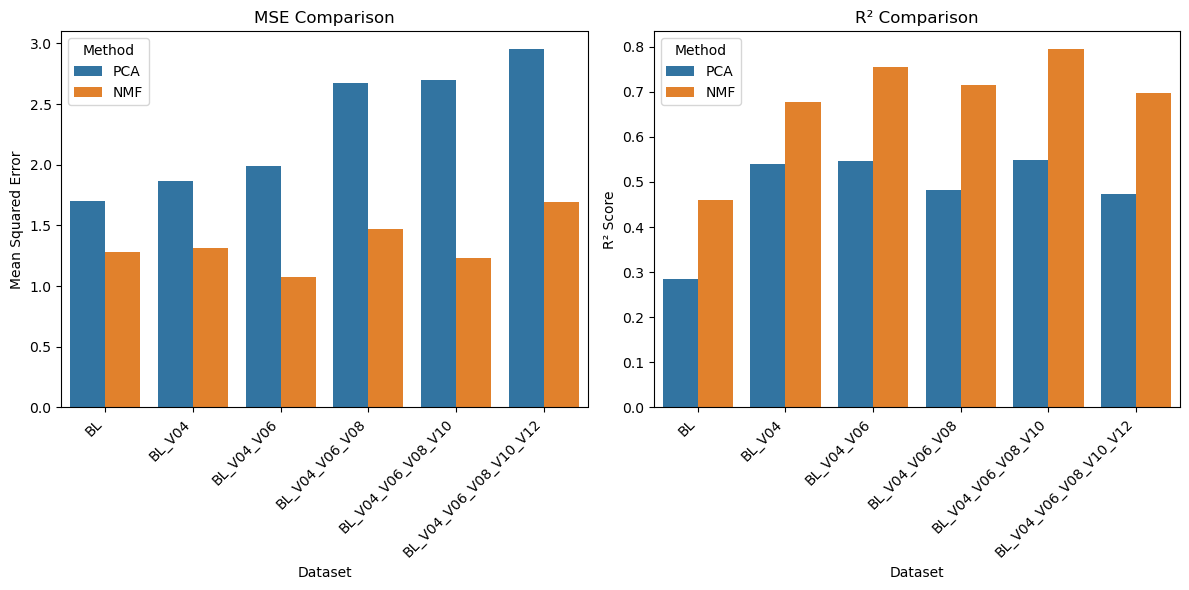

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot MSE for PCA and NMF across datasets
plt.subplot(1, 2, 1)
sns.barplot(x='Dataset', y='MSE', hue='Method', data=results_df)
plt.title('MSE Comparison')
plt.ylabel('Mean Squared Error')
plt.xlabel('Dataset')
plt.legend(title='Method')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Plot R² for PCA and NMF across datasets
plt.subplot(1, 2, 2)
sns.barplot(x='Dataset', y='R2', hue='Method', data=results_df)
plt.title('R² Comparison')
plt.ylabel('R² Score')
plt.xlabel('Dataset')
plt.legend(title='Method')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


1. **Lower MSE for NMF:** Across all datasets, the NMF method consistently shows lower Mean Squared Error (MSE) compared to PCA.

2. **Higher R² for NMF:** NMF achieves higher R² scores than PCA in all datasets, indicating better predictive performance.

3. **Increasing MSE for PCA:** As the number of visits increases (from BL to BL_V04_V06_V08_V10_V12), the MSE for PCA generally increases.

4. **Stable MSE for NMF:** The MSE for NMF remains relatively stable as the number of visits increases.

5. **PCA Performance Decline:** PCA's performance, as indicated by increasing MSE, declines more noticeably as more visits are included.

6. **NMF Outperforms PCA:** NMF outperforms PCA in both error reduction (lower MSE) and explained variance (higher R²) across all datasets.

7. **Best Performance for NMF:** The best performance for NMF is seen in the datasets with more visits, where it maintains low MSE and high R².

8. **PCA's Higher Error:** PCA shows significantly higher error (MSE) especially in datasets with more visits.

9. **Predictive Consistency of NMF:** NMF provides more consistent predictive accuracy across different datasets.

10. **R² Improvement with NMF:** NMF consistently improves the R² score, indicating a better fit of the model to the data compared to PCA.

In [8]:
def predict_and_evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_performance_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

In [10]:
def extract_and_drop_target(df, target_column_name, visit):
    # Extract the target column
    target_column = df[(target_column_name, visit)]
    
    # Drop the target column from the main dataframe
    df = df.drop(columns=[(target_column_name, visit)])
    
    return df, target_column



In [11]:
from sklearn.model_selection import GridSearchCV

def grid_search(X_train, y_train):
    model = LinearRegression()
    param_grid = {
        'fit_intercept': [True, False],
        'normalize': [True, False]
    }
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_

In [12]:
def drop_updrs_2_3_4(df):
    updrs2_columns = ["NP2SPCH", "NP2SALV", "NP2SWAL", "NP2EAT", "NP2DRES", "NP2HYGN", "NP2HWRT",
                  "NP2HOBB", "NP2TURN", "NP2TRMR", "NP2RISE", "NP2WALK", "NP2FREZ"]
    
# "['CMEDTM', 'EXAMTM', 'PN3RIGRL', 'DYSKPRES', 'DYSKIRAT', 'ANNUAL_TIME_BTW_DOSE_NUPDRS', 'ON_OFF_DOSE', 'PD_MED_USE']
    updrs3_columns = ["NP3SPCH", "NP3FACXP", "NP3RIGN", "NP3RIGRU", "NP3RIGLU", "NP3RIGLL",
                  "NP3FTAPR", "NP3FTAPL", "NP3HMOVR", "NP3HMOVL", "NP3PRSPR", "NP3PRSPL", "NP3TTAPR", "NP3TTAPL", "NP3LGAGR",
                  "NP3LGAGL", "NP3RISNG", "NP3GAIT", "NP3FRZGT", "NP3PSTBL", "NP3POSTR", "NP3BRADY", "NP3PTRMR", "NP3PTRML",
                  "NP3KTRMR", "NP3KTRML", "NP3RTARU", "NP3RTALU", "NP3RTARL", "NP3RTALL", "NP3RTALJ", "NP3RTCON",
                   "NHY"]

#     updrs4_columns = ["NP4WDYSK", "NP4DYSKI", "NP4OFF", "NP4FLCTI", "NP4FLCTX", "NP4DYSTN"]
    df = df.drop(columns=updrs2_columns + updrs3_columns)
    
    return df
    

In [13]:
def add_updrs1_column(df):
    updrs1_columns = ['NP1COG', 'NP1HALL', 'NP1DPRS', 'NP1ANXS', 'NP1APAT', 'NP1DDS',
                      'NP1SLPN', 'NP1SLPD', 'NP1PAIN', 'NP1URIN', 'NP1CNST', 'NP1LTHD', 'NP1FATG']
    
    updrs1_multiindex = pd.MultiIndex.from_product([['UPDRS1'], df.columns.levels[1]], names=df.columns.names)

    updrs1_df = pd.DataFrame(index=df.index, columns=updrs1_multiindex)
    
    for visit in df.columns.levels[1]:
        updrs1_df[('UPDRS1', visit)] = df.loc[:, (updrs1_columns, visit)].sum(axis=1)
    
    df = df.drop(columns=updrs1_columns)
    
    df = pd.concat([df, updrs1_df], axis=1)
    
    return df

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

def complete_workflow_pca(dataframe, target_column):

    if 'PATNO' in dataframe.index.names:
        patient_ids = dataframe.index.get_level_values('PATNO')
    elif 'PATNO' in dataframe.columns.get_level_values(0):
        patient_ids = dataframe['PATNO']
        
    if 'PATNO' in dataframe.columns.get_level_values(0):
        dataframe = dataframe.drop(columns='PATNO', level=0)
    
    X_train, X_test, y_train, y_test = train_test_split(dataframe, target_column, test_size=0.2, random_state=42)
    
    pipeline = Pipeline([
        ('normalizer', MinMaxScaler()),  # Using MinMaxScaler for normalization
        ('pca', PCA(n_components=3))  # Retain 95% of variance
    ])
    
    X_train_transformed = pipeline.fit_transform(X_train)
    
    X_test_transformed = pipeline.transform(X_test)
    
    best_model, best_params, best_score = grid_search(X_train_transformed, y_train)
    
    mse, r2 = predict_and_evaluate(best_model, X_test_transformed, y_test)
    
    return best_model, best_params, best_score, mse, r2

In [15]:
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split

def complete_workflow_nmf(dataframe, target_column):
    # Extract patient IDs if they are part of the index or columns
    if 'PATNO' in dataframe.index.names:
        patient_ids = dataframe.index.get_level_values('PATNO')
    elif 'PATNO' in dataframe.columns.get_level_values(0):
        patient_ids = dataframe['PATNO']
    
    # Drop patient ID columns if they exist in the dataframe
    if 'PATNO' in dataframe.columns.get_level_values(0):
        dataframe = dataframe.drop(columns='PATNO', level=0)
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(dataframe, target_column, test_size=0.2, random_state=42)
    
    # Handle negative values for NMF
#     X_train = handle_negative_values(X_train)
#     X_test = handle_negative_values(X_test)
    
    # Apply NMF
    nmf = NMF(n_components=5, random_state=42)
    X_train_nmf = nmf.fit_transform(X_train)
    X_test_nmf = nmf.transform(X_test)
    
    # Perform grid search to find the best model
    best_model, best_params, best_score = grid_search(X_train_nmf, y_train)

    # Evaluate the model on the test data
    mse, r2 = predict_and_evaluate(best_model, X_test_nmf, y_test)
    
    return best_model, best_params, best_score, mse, r2

# Example usage
# best_model, best_params, best_score, mse, r2 = complete_workflow_nmf(bl_v04_dataframe, target_column)
